# What is MNIST dataset?
Image result for mnist dataset
The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9

In [2]:
'''
[] config
[] hyper parameter 
[] dataset
[] dataloader
[] data visualization
[] model designing
[] criterion and optimizer
[] training loop (with batch)
'''

'\n[] config\n[] hyper parameter \n[] dataset\n[] dataloader\n[] data visualization\n[] model designing\n[] criterion and optimizer\n[] training loop (with batch)\n'

In [3]:
# imports

import torch
import torch.nn as nn

from torchvision  import datasets,transforms
from torch.utils.data import dataset,dataloader

import matplotlib.pyplot as plot



In [4]:
# configs

# device config

device_name = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(device=device_name)
print(f"device used: {device}")

device used: cpu


In [5]:
# hyper parameters

input_layer_nodes = 28*28 # input grid size

hidden_layer_nodes = 100 # used for improving classification

output_layer_nodes = 10 # total number of classes

batch_size = 64 # fast training use 32 or 64

learning_rate = 0.01 # learning rate

number_of_epochs = 2 # number of epochs





# Data from Dataset

In [6]:
class Reshape():

    def __init__(self,row,col) -> None:
        self.row = row
        self.col = col
    
    def __call__(self,single_sample):
        # print(single_sample)
        features = single_sample

        features  = features.view(-1,self.row*self.col)

        return features


composed_transform = transforms.Compose(transforms=[
    transforms.ToTensor(),
    Reshape(28,28)
])


In [7]:
train_dataset = datasets.MNIST(
    root="./data/mnist/",
    download=True,
    train=True,
    transform= composed_transform
    )
# train_dataset.data.shape
# train_dataset.__getitem__(0)

In [8]:
test_dataset = datasets.MNIST(
    root='./data/mnist/',
    train=False,
    download=True,
    transform=transforms.transforms.ToTensor()
)
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [9]:
train_loader = dataloader.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
    )

test_loader = dataloader.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
    
)

In [10]:
all_sample = iter(train_loader)

first_sample = all_sample.next()

sample,label = first_sample

print(f"sample size : {sample.shape}")
print(f"label size: {label.shape}")

# print(f"sample : {sample}")
# print(f"label: {label}")



sample size : torch.Size([64, 1, 784])
label size: torch.Size([64])


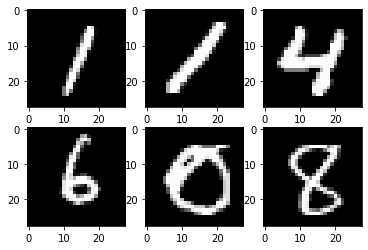

In [11]:
for i in range(6):
    plot.subplot(2,3,i+1)
    plot.imshow(sample[i][0].view(28,28),cmap="gray")
plot.show()

# Designing Neural Network

In [12]:
# Neural Network

class NeuralNetork(nn.Module):

    def __init__(self,input_layer_nodes,hidden_layer_nodes,output_layer_nodes) -> None:
        super(NeuralNetork,self).__init__()

    
        self.input_layer = nn.Linear(in_features=input_layer_nodes,out_features=hidden_layer_nodes)
        
        self.relu_activation = nn.ReLU()

        self.hiden_layer = nn.Linear(in_features=hidden_layer_nodes,out_features=output_layer_nodes)

        # no softmax

    
    def forward(self,batch_samples):
        out = batch_samples.view(-1,28*28)
        # print(out.shape)
        out = self.input_layer(out)

        out = self.relu_activation(out)

        out = self.hiden_layer(out)

        return out

model = NeuralNetork(input_layer_nodes=input_layer_nodes,hidden_layer_nodes=hidden_layer_nodes,output_layer_nodes=output_layer_nodes)

# criterian and optimizer

In [13]:

criterian = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

# Training Loop

In [14]:
for epoch in range(number_of_epochs):

    for i,(sample,labels) in enumerate(train_loader):
        # making grad zero for each next batch size
        optimizer.zero_grad()

        # sample = sample.view(-1,28*28).to(device)
        # print(sample.shape)
        sample = sample.to(device)
        # print(sample.shape)

        labels = labels.to(device)

        y_predict = model(sample)

        loss = criterian(y_predict,labels)

        loss.backward()

        optimizer.step()

        if (i+1) % 100 == 0:
            
            print(f"-------------------- iteration --{i+1} ----------------")

            print(f"loss: {loss:.03f}")

-------------------- iteration --100 ----------------
loss: 0.145
-------------------- iteration --200 ----------------
loss: 0.192
-------------------- iteration --300 ----------------
loss: 0.118
-------------------- iteration --400 ----------------
loss: 0.092
-------------------- iteration --500 ----------------
loss: 0.148
-------------------- iteration --600 ----------------
loss: 0.229
-------------------- iteration --700 ----------------
loss: 0.179
-------------------- iteration --800 ----------------
loss: 0.193
-------------------- iteration --900 ----------------
loss: 0.090
-------------------- iteration --100 ----------------
loss: 0.103
-------------------- iteration --200 ----------------
loss: 0.178
-------------------- iteration --300 ----------------
loss: 0.255
-------------------- iteration --400 ----------------
loss: 0.052
-------------------- iteration --500 ----------------
loss: 0.015
-------------------- iteration --600 ----------------
loss: 0.167
----------

# Testing

In [15]:
n_samples = 0
n_correct = 0
with torch.no_grad():
    for (batch_samples,label) in iter(test_loader):

        batch_samples = batch_samples.to(device)
        y_predict = model(batch_samples)

        _,prediction = torch.max(y_predict,dim=1)

        n_correct += (prediction == label).sum()

        n_samples += batch_samples.shape[0]

    acc = n_correct/ n_samples

print(f"accuracy: {acc}")

    

accuracy: 0.963699996471405
